In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re 


## Load Data

### • Data collected on Sep 14, Tuesday (9:30pm)
#### • AppleEvent, WWDC21 (Apples press event releasing new products)
#### • key word = 'iPhone 13'


In [2]:
tweets_df = pd.read_csv('/Users/sumedtamang/Documents/Projects/twitter_Scrape_twint/data/iphone13_2K_100.csv')

## Preliminary Exploration

In [3]:
# raw df 
tweets_df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1437956103015256064,1437956103015256064,2021-09-14 20:47:05 CDT,2021-09-14,20:47:05,-500,17338082,tmobile,T-Mobile,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1437954047194148864,1437954047194148864,2021-09-14 20:38:55 CDT,2021-09-14,20:38:55,-500,1253459831404613632,sanmemero,San Memero 🇨🇺,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1437952133123297281,1437952133123297281,2021-09-14 20:31:19 CDT,2021-09-14,20:31:19,-500,1065040351,ihrvortrag,𝓝,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1437951699923001344,1437951699923001344,2021-09-14 20:29:35 CDT,2021-09-14,20:29:35,-500,830695053118943232,universeice,Ice universe,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1437948820357324802,1437948820357324802,2021-09-14 20:18:09 CDT,2021-09-14,20:18:09,-500,29873662,mkbhd,Marques Brownlee,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,1437647499280490497,1437647499280490497,2021-09-14 00:20:48 CDT,2021-09-14,00:20:48,-500,91478624,forbes,Forbes,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1648,1437645727421718531,1437645727421718531,2021-09-14 00:13:46 CDT,2021-09-14,00:13:46,-500,1070040677537464322,anirudh_2103_,Anirudh ,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1649,1437644911940042752,1437644911940042752,2021-09-14 00:10:31 CDT,2021-09-14,00:10:31,-500,42606652,aajtak,AajTak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1650,1437644837830873094,1437644837830873094,2021-09-14 00:10:14 CDT,2021-09-14,00:10:14,-500,933233562223915010,marinebharat,InfraStory.com,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [4]:
# see all columns
print(tweets_df.columns.tolist())

['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone', 'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest']


In [5]:
# count of rows and columns
tweets_df.shape

(1652, 36)

In [6]:
# Simplyfying the data and only selecting important columns
# Only selecting tweets that are im English
tweets_df_cleaned = tweets_df[['date','time','username','tweet','replies_count','retweets_count','likes_count', 'language']]
tweets_df_cleaned = tweets_df_cleaned.loc[tweets_df_cleaned['language']=='en']
tweets_df_cleaned

,date,time,username,tweet,replies_count,retweets_count,likes_count,language
0,2021-09-14,20:47:05,tmobile,The powerful iPhone 13 Pro is coming! What's ...,44,42,192,en
2,2021-09-14,20:31:19,ihrvortrag,iPhone 12 users upgraded to iPhone 13 be like ...,4,236,500,en
3,2021-09-14,20:29:35,universeice,"The iPhone 13 series is released, which one do...",105,7,170,en
4,2021-09-14,20:18:09,mkbhd,NEW VIDEO - My reaction to the iPhone 13 lineu...,61,140,1882,en
5,2021-09-14,20:11:01,nuicemedia,New toys to want from last night’s #AppleEvent...,16,38,170,en
...,...,...,...,...,...,...,...,...
1645,2021-09-14,00:42:04,stalman,I made it this far without any iPhone 13 rumor...,10,3,231,en
1646,2021-09-14,00:26:53,phoncharm,me at the apple store with an iphone 13 128GB ...,7,54,437,en
1647,2021-09-14,00:20:48,forbes,New Apple Leak Reveals iPhone 13 Release Shock...,10,26,146,en
1648,2021-09-14,00:13:46,anirudh_2103_,How to upgrade from your iPhone 12 to the iPho...,29,19,153,en


In [7]:
tweets_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 1650
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            693 non-null    object
 1   time            693 non-null    object
 2   username        693 non-null    object
 3   tweet           693 non-null    object
 4   replies_count   693 non-null    int64 
 5   retweets_count  693 non-null    int64 
 6   likes_count     693 non-null    int64 
 7   language        693 non-null    object
dtypes: int64(3), object(5)
memory usage: 48.7+ KB


In [8]:
# filter the data by likes 
by_likes = tweets_df_cleaned.sort_values(['likes_count'], ascending=[False])
by_likes

,date,time,username,tweet,replies_count,retweets_count,likes_count,language
1342,2021-09-14,12:39:52,mkbhd,iPhone 13 https://t.co/dVHTR0YSlY,562,2018,22853,en
96,2021-09-14,17:03:49,tim_cook,"Introducing iPhone 13 and iPhone 13 Pro, all-n...",901,4085,20671,en
317,2021-09-14,14:31:12,mkbhd,The iPhone 13 Pro shoots 4K 30fps ProRes video...,584,1380,18308,en
786,2021-09-14,13:15:19,mkbhd,iPhone 13 Pro A15 Bionic 20% smaller notch 120...,597,3376,17403,en
1089,2021-09-14,12:55:42,mkbhd,iPhone 13’s biggest features: A15 Bionic New c...,550,3071,15453,en
...,...,...,...,...,...,...,...,...
1314,2021-09-14,12:40:50,okay_wasabi,iPhone 13 Leaks Correct!!! #AppleEvent,1,2,106,en
803,2021-09-14,13:14:01,drolufunmilayo,"So tech people, What is the real difference be...",10,27,106,en
1269,2021-09-14,12:42:31,darth,omfg iphone 13 mini,5,2,106,en
830,2021-09-14,13:11:32,kameronbennett,New iPhone 13 options… lol which one you want?...,25,16,105,en


## VADER

In [9]:
analyzer = SentimentIntensityAnalyzer()

In [10]:
sentences = tweets_df["tweet"]
sentence_sample = sentences[:10]
sentence_sample_df=pd.DataFrame(sentence_sample)
sentence_sample_df

,tweet
0,The powerful iPhone 13 Pro is coming! What's ...
1,Diferencias entre el iPhone 13 y el 12: 1. Es...
2,iPhone 12 users upgraded to iPhone 13 be like ...
3,"The iPhone 13 series is released, which one do..."
4,NEW VIDEO - My reaction to the iPhone 13 lineu...
5,New toys to want from last night’s #AppleEvent...
6,"Agora que a Apple lançou o Iphone 13, vou espe..."
7,re: iPhone 13 pro/pro max 128GB being capped a...
8,Eu e o povo do Twitter curtindo e decurtindo s...
9,iPhone 13のディスプレイ説明の英語→日本語、どうしてこうなった https://t...


In [11]:
sentence_all = sentences[:]
sentence_all_df = pd.DataFrame(sentence_all)
sentence_all_df

,tweet
0,The powerful iPhone 13 Pro is coming! What's ...
1,Diferencias entre el iPhone 13 y el 12: 1. Es...
2,iPhone 12 users upgraded to iPhone 13 be like ...
3,"The iPhone 13 series is released, which one do..."
4,NEW VIDEO - My reaction to the iPhone 13 lineu...
...,...
1647,New Apple Leak Reveals iPhone 13 Release Shock...
1648,How to upgrade from your iPhone 12 to the iPho...
1649,"Apple का आज बड़ा इवेंट, iPhone 13 मॉडल्स से उठ..."
1650,Apple will relaunch iPhone XR today as rebrand...


In [12]:
# remove URLS from tweets
sentence_all_df.tweet = sentence_all_df.tweet.apply(lambda x:re.sub(r"http\S+", "", x))

# remove twitter handlers
sentence_all_df.text = sentence_all_df.tweet.apply(lambda x:re.sub('@[^\s]+','',x))

# remove hashtags
sentence_all_df.text = sentence_all_df.tweet.apply(lambda x:re.sub(r'\B#\S+','',x))

/Users/sumedtamang/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [13]:
sentence_all_df['sentiments']           = sentence_all_df['tweet'].apply(lambda x: analyzer.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
sentence_all_df['Positive Sentiment']   = sentence_all_df['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
sentence_all_df['Neutral Sentiment']    = sentence_all_df['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
sentence_all_df['Negative Sentiment']   = sentence_all_df['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

sentence_all_df.drop(columns=['sentiments'],inplace=True)

In [14]:
sentence_all_df

,tweet,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,The powerful iPhone 13 Pro is coming! What's ...,0.186001,0.814001,0.000001
1,Diferencias entre el iPhone 13 y el 12: 1. Es...,0.000001,0.929001,0.071001
2,iPhone 12 users upgraded to iPhone 13 be like ...,0.217001,0.783001,0.000001
3,"The iPhone 13 series is released, which one do...",0.000001,1.000001,0.000001
4,NEW VIDEO - My reaction to the iPhone 13 lineu...,0.000001,1.000001,0.000001
...,...,...,...,...
1647,New Apple Leak Reveals iPhone 13 Release Shock,0.000001,0.545001,0.455001
1648,How to upgrade from your iPhone 12 to the iPho...,0.205001,0.795001,0.000001
1649,"Apple का आज बड़ा इवेंट, iPhone 13 मॉडल्स से उठ...",0.000001,1.000001,0.000001
1650,Apple will relaunch iPhone XR today as rebrand...,0.000001,1.000001,0.000001


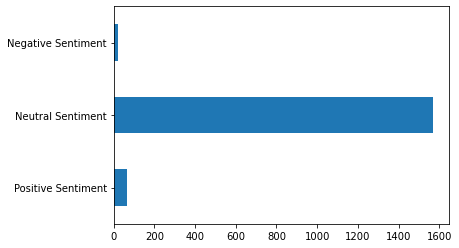

In [15]:
sentence_all_df[['Positive Sentiment','Neutral Sentiment','Negative Sentiment']].sum().plot.barh()
plt.show()

In [16]:
def sentiment_count(row):
    if row['Positive Sentiment'] > row['Negative Sentiment']:
        val = 1
    else:
        val = 0
    return val 

In [17]:
def n_sentiment_count(row):
    if row['Negative Sentiment'] > row['Positive Sentiment']:
        val = 1
    else:
        val = 0
    return val 

In [18]:
sentence_all_df['Positive_Count'] = sentence_all_df.apply(sentiment_count, axis=1)

In [19]:
sentence_all_df['Negative_Count'] = sentence_all_df.apply(n_sentiment_count, axis=1)

In [20]:
sentence_all_df.head()

,tweet,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Positive_Count,Negative_Count
0,The powerful iPhone 13 Pro is coming! What's ...,0.186001,0.814001,0.000001,1,0
1,Diferencias entre el iPhone 13 y el 12: 1. Es...,0.000001,0.929001,0.071001,0,1
2,iPhone 12 users upgraded to iPhone 13 be like ...,0.217001,0.783001,0.000001,1,0
3,"The iPhone 13 series is released, which one do...",0.000001,1.000001,0.000001,0,0
4,NEW VIDEO - My reaction to the iPhone 13 lineu...,0.000001,1.000001,0.000001,0,0


In [21]:
print(sentence_all_df[['Positive_Count','Negative_Count']].sum())

Positive_Count    335
Negative_Count    137
dtype: int64


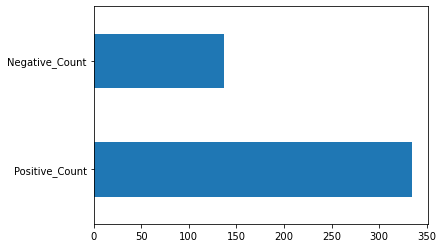

In [33]:
sentence_all_df[['Positive_Count','Negative_Count']].sum().plot.barh()
plt.show()

## WordCloud

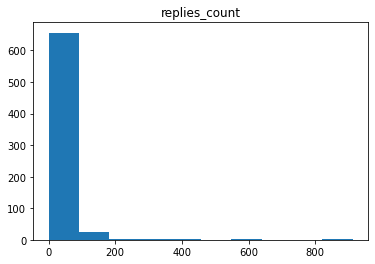

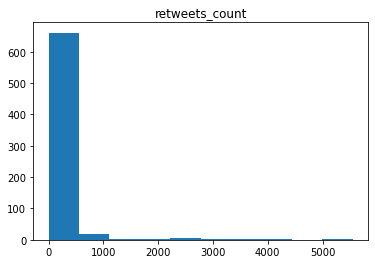

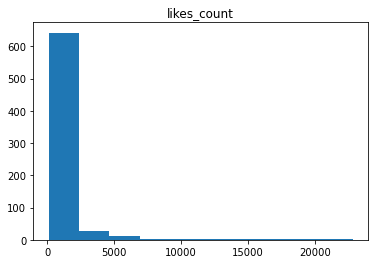

In [9]:
# histogram of "likes retweets and replies"
col = by_likes[['replies_count', 'retweets_count', 'likes_count']]
for i in col.columns:
  plt.hist(col[i])
  plt.title(i)
  plt.show()

In [10]:
print(f"There are {by_likes.shape[0]} observations and {by_likes.shape[1]} features in this dataset. \n")

print(f"There are {len(by_likes.username.unique())} unique users in this dataset such as {by_likes.username.unique()[0:5]}... \n")
                                                                          

#print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
#                                                                                      ", ".join(df.country.unique()[0:5])))

There are 693 observations and 8 features in this dataset. 

There are 442 unique users in this dataset such as ['mkbhd' 'tim_cook' 'thebabylonbee' 'sbscreen' 'mariners_markus']... 



In [11]:
?WordCloud

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

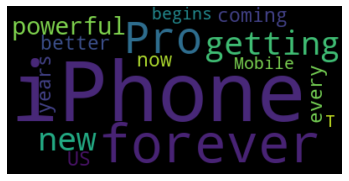

In [12]:
# test with 1st text in df
text = by_likes.tweet[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


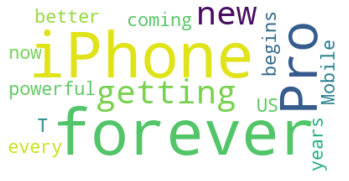

In [13]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=75, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
# joinging all the text on the tweet column

text = " ".join(i for i in by_likes.tweet)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 81594 words in the combination of all review.


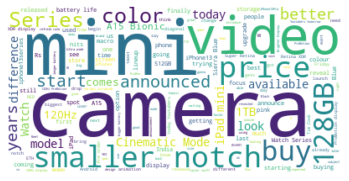

In [15]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['https','t','co','AppleEvent','iPhone','new','Apple','feature','Max','s','will','Pro','features','year','amp','come','now','event'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
apple_mask = np.array(Image.open("/Users/sumedtamang/Documents/Projects/twitter_Scrape_twint/images/apple_s.png"))
apple_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [17]:
# WC color Gery 
import random
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(70, 90)

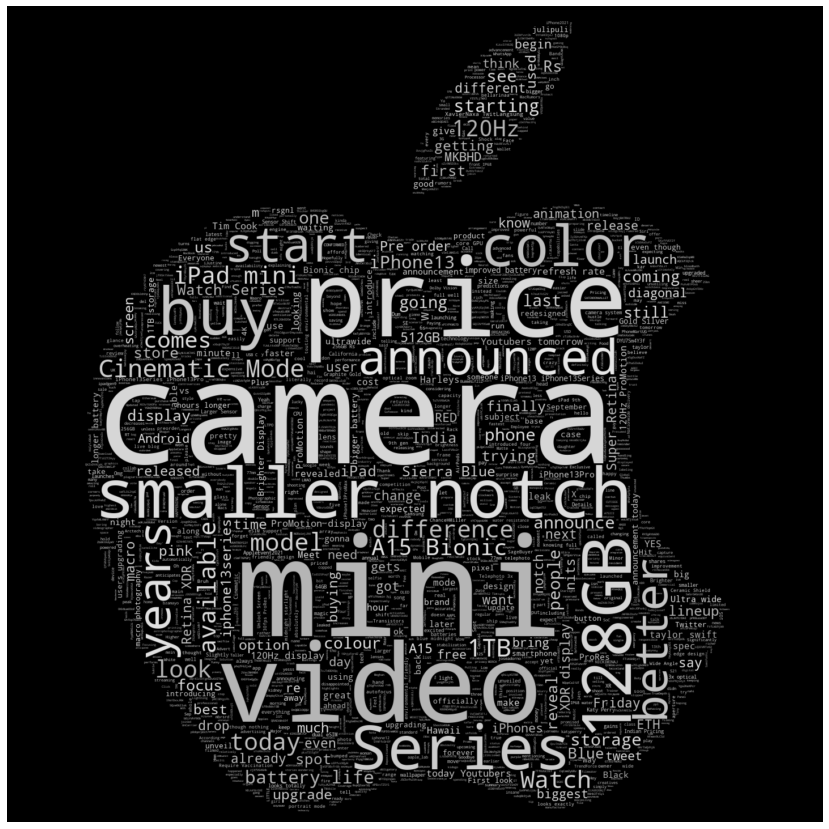

In [18]:
# Create a word cloud image
wc = WordCloud(background_color="black", max_words=2000, mask=apple_mask, stopwords=stopwords)

# Generate a wordcloud
wc.generate(text)

# show
plt.figure(figsize=[20,15])
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
#store to file
wc.to_file("/Users/sumedtamang/Documents/Projects/twitter_Scrape_twint/images/apple_T1.png")